## Modell: Validierung

Dieses Modell wurde zeitlich ziemlich zu Beginn der Arbeit entworfen, um die Simulation testen zu können. Dafür wurde ein dummy-EV erstellt und in die Simulation geladen. Der Dummy hat einen konstanten Verbrauch von 100kW. Somit wird der Verbrauch linear konstant sein und lediglich von der Anzahl der EVs abhängen.

Viele Funktionen sind hier noch nicht implementiert.
Parkdauer und Ankünfte innerhalb festgelegter Parameter randomisiert --> siehe zugehörige settings.json



In [1]:
import random
import pandas as pd
import matplotlib.dates as mdates
import json
import numpy as np
import matplotlib.pyplot as plt
import model_v1

with open("settings_model_validation.json", "r") as f:
    settings = json.load(f)

model4 = model_v1.Model("dummy_100kW", 100)

# Initialize parking
parking = model_v1.Parking(int(settings["number_of_stations"]), int(settings["max_power_per_station"]))
# parking = Parking(4, 50)

df_results = pd.DataFrame()  # Dataframe mit timecode und den Ergebnissen
df_results.index = pd.date_range(start='20.02.2023 00:00:00', end='21.02.2023 00:00:00', freq='Min')

if 'power_per_minute' not in df_results.columns:
    df_results['power_per_minute'] = 0

if 'number_cars_charging' not in df_results.columns:
    df_results['number_cars_charging'] = 0

# Simulate charging process
# for minute in range(1, 61):
#   print(f"Minute: {minute}")
for row_index in df_results.iterrows():
    # Generate random number of new cars
    # num_new_cars = random.randint(0, 1)

    num_new_cars = model_v1.rand_new_car(10)
    for _ in range(num_new_cars):
        # car_model = random.choice([model1, model2, model3])
        car_model = model4  # zum test nur bestimmtes Model laden
        total_parking_duration = random.randint(*settings["parking_duration"])  # Parkdauer aus Settings
        new_car = model_v1.Car(car_model, total_parking_duration)
        parking.add_car(new_car)

    # Charge cars and remove ready cars
    for car in parking.charging_cars:
        power, ready = car.charge()
        # df_results['power_per_minute'] = df_results['power_per_minute'] + power
        # df_results['power_per_minute'] = power
        df_results.loc[row_index[0], 'power_per_minute'] += power

        car.current_parking_duration += 1
        if ready:
            parking.remove_ready_cars()

        df_results.loc[row_index[0], 'number_cars_charging'] = parking.charging_cars.__len__()

Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  1
Alle Ladesäulen belegt. Abgewiesene EVs:  2
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  3
Alle Ladesäulen belegt. Abgewiesene EVs:  4
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  5
Alle Ladesäulen belegt. Abgewiesene EVs:  6
Alle Ladesäulen belegt. Ab

Alle Ladesäulen belegt. Abgewiesene EVs:  1
Alle Ladesäulen belegt. Abgewiesene EVs:  2
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  3
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  4
Alle Ladesäulen belegt. Abgewiesene EVs:  5
Alle Ladesäulen belegt. Abgewiesene EVs:  6
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Alle Ladesäulen belegt. Abgewiesene EVs:  7
Alle Ladesäulen belegt. Abgewiesene EVs:  8
Car with model 'dummy_100kW' is fully charged and leaving the parking.
Car with 

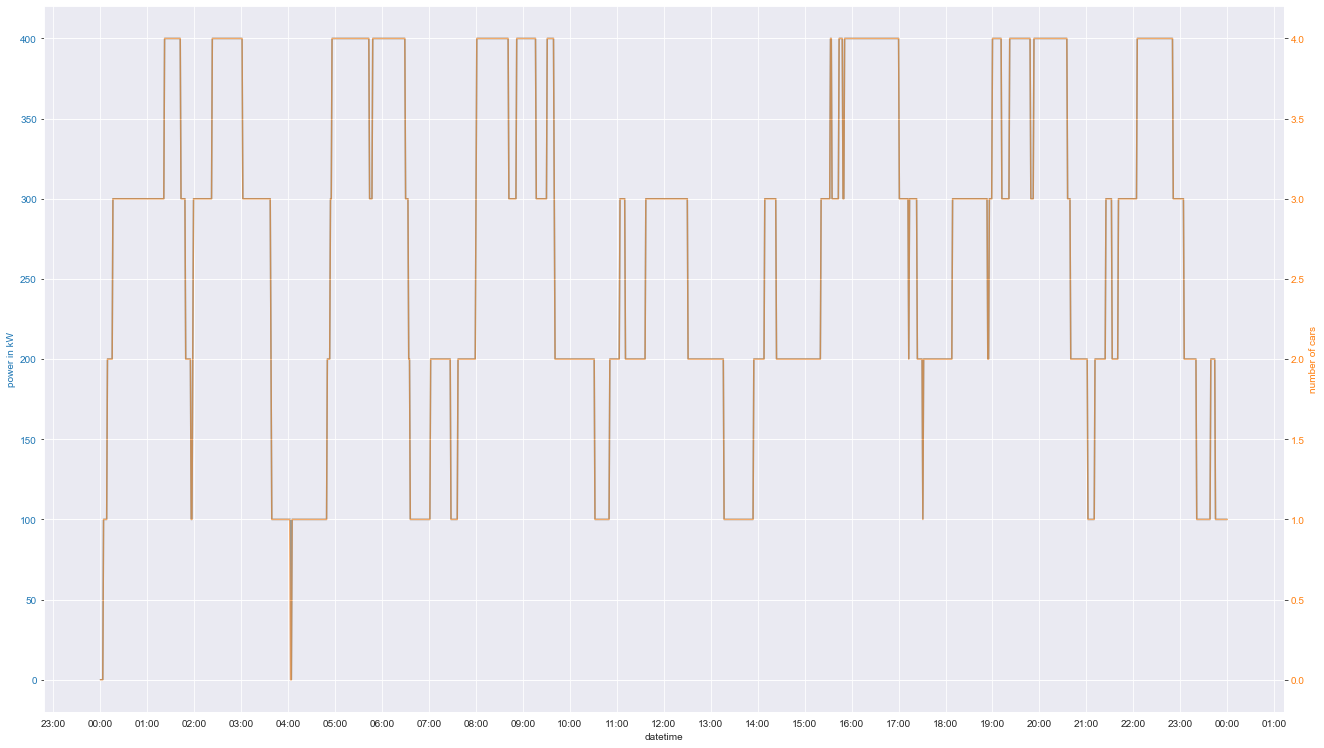

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,272.102706,2.720333
std,105.601876,1.057478
min,0.000000,0.000000
25%,200.000000,2.000000
50%,300.000000,3.000000
75%,400.000000,4.000000
max,400.000000,4.000000


In [10]:
# %reset
import importlib
# import random
import pandas as pd
# import matplotlib.dates as mdates
# import json
# import numpy as np
# import matplotlib.pyplot as plt
import model_v1
importlib.reload(model_v1)

# with open("settings_model_validation.json", "r") as f:
  #   settings = json.load(f)
  
df_results_returned = model_v1.simulation("settings_model_validation.json")
df_results_returned.describe()

Nach der Simulation stehen die Ergebnisse in dem Dataframe 'df_results_returned' und können geplottet werden

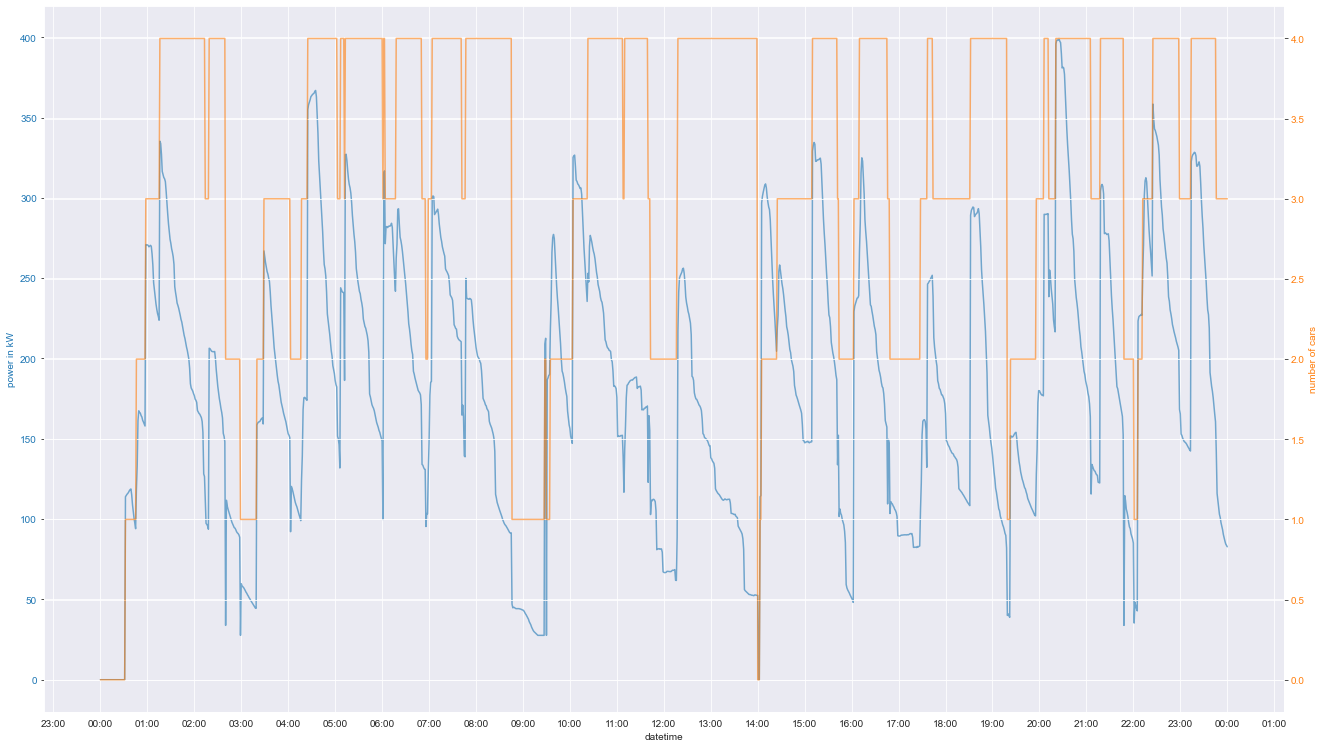

In [3]:
# Create figure with secondary y-axis
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
color = 'tab:blue'
ax1.set_xlabel('datetime')
ax1.set_ylabel('power in kW', color=color)
ax1.plot(np.asarray(df_results_returned.index), np.asarray(df_results_returned['power_per_minute']), c=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('number of cars', color=color)  # we already handled the x-label with ax1
ax2.plot(np.asarray(df_results_returned.index), np.asarray(df_results_returned['number_cars_charging']), c=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim(0, settings["number_of_stations"])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)

# fig.autofmt_xdate()
# date_form = mdates.DateFormatter("%H:%M")
# ax1.xaxis.set_major_formatter(date_form)

# df_results.plot()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()